## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('./LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [3]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [4]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [5]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [6]:
lj_data.shape

(2760, 13)

In [7]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html


In [7]:
lj_data.describe()

,price,view_num
count,2760.000000,2760.000000
mean,7570.800725,13.448913
std,6316.204986,12.746202
min,1300.000000,0.000000
25%,4500.000000,4.000000
50%,6000.000000,10.000000
75%,8500.000000,19.000000
max,210000.000000,122.000000


### 找到最近更新信息的20套房子

In [8]:
lj_data.sort_values(by='update_time').tail(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
467,万柳租房,康桥水郡,昆玉河畔观景大宅 复式4居20平露台有车位 明厨明卫,4室1厅,199平米,25000,高楼层(共16层),2004年建板楼,东 西,2017.07.27,7,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101744630.html
2358,新华大街租房,怡佳家园,怡佳家园 5室2厅 15000元,5室2厅,240平米,15000,高楼层(共28层),2002年建塔楼,东 南 北,2017.07.27,6,距离八通线通州北苑站1062米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101704899.html
2356,亚运村租房,安慧里四区,安慧里简装朝东南一居室，家具家电齐全，可拎包入住,1室1厅,43平米,4500,高楼层(共6层),1989年建板楼,东南,2017.07.27,19,距离5号线惠新西街北口站441米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101174347.html
475,金宝街租房,禾风相府,禾风相府 舒适三居 拎包入住 交通便利,3室1厅,163平米,32000,高楼层(共14层),2004年建板塔结合,南 北,2017.07.27,13,距离5号线东四站619米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101767933.html
2334,苏州桥租房,中湾国际,中湾国际 1室0厅 6500元,1室0厅,37平米,6500,中楼层(共19层),2007年建塔楼,北,2017.07.27,2,距离10号线苏州街站791米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101849862.html
2335,玉泉营租房,鸿业兴园一区,鸿业兴园 正规两居室 家电家具全齐,2室1厅,91平米,5500,中楼层(共16层),2006年建板塔结合,南,2017.07.27,4,随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101831875.html
1153,滨河西区租房,双峪路小区,双峪路小区有一精装修两室一厅出租,2室1厅,48平米,3100,中楼层(共5层),1981年建板楼,南,2017.07.27,12,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101790165.html
1829,北七家租房,西湖新村,水系社区 带花园的2居室 北边无遮挡采光充裕 居住舒适,2室2厅,94平米,3400,低楼层(共7层),2000年建板楼,南 北,2017.07.27,12,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101630022.html
1158,通州北苑租房,长城国际,长城国际 精装一居 电梯房 拎包入住,1室1厅,53平米,3300,中楼层(共22层),2010年建塔楼,东,2017.07.27,18,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101791183.html
487,陶然亭租房,四平园,四平园 1室1厅 4600,1室1厅,53平米,4600,中楼层(共6层),1996年建板楼,东,2017.07.27,14,距离4号线陶然亭站719米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779348.html


### 平均看房人数

In [9]:
lj_data.view_num.mean()

13.44891304347826

### 房龄最小的20套房子的平均看房人数、平均面积...

In [13]:
import numpy as np

In [11]:
def get_age(x):
    try:
        return 2018-int(x)
    except:
        return np.NaN

In [14]:
lj_data['buliding_age'] = lj_data['build_time'].apply(get_age)

### 房子价格的分布(平均，方差，中位数)

In [15]:
lj_data['price'].mean()

7570.800724637681

In [17]:
lj_data['price'].std()

6316.204986067457

In [19]:
lj_data['price'].median()

6000.0

### 最受欢迎的朝向(平均看房人数)

In [23]:
lj_data.groupby('direction').mean()['view_num'].sort_values(ascending=False)

direction
东 东北       34.000000
西 北        28.250000
西南 西       25.000000
东 东南 南     21.000000
西北         19.478261
东 北        19.454545
东 南 西      19.000000
南 西        16.461538
西南         16.439490
北          16.369369
东 西北       16.333333
南 西 北      15.444444
东北         15.393443
东南 西南      14.666667
东南         14.193717
东 西        14.028846
东          13.728395
南          13.667890
西          13.587097
东 南        13.028571
东 南 北      12.952381
西南 东北      12.000000
东 西南       12.000000
东 西 北      12.000000
南 北        11.679881
东南 西北      11.666667
东南 南       10.800000
东 南 西 北    10.333333
东南 北       10.000000
东 东南        8.000000
西南 北        7.636364
南 西北        6.888889
南 西南        6.333333
东南 西        3.666667
东南 东北       3.000000
Name: view_num, dtype: float64

### 房型数量分布

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
plt.rc('font', family='SimHei', size=13)

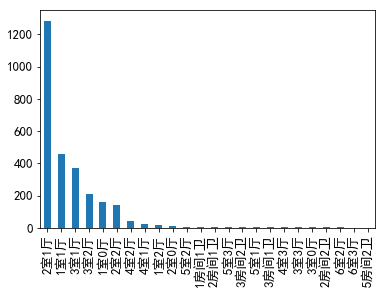

In [28]:
lj_data['house_type'].value_counts().plot(kind='bar')

### 最受欢迎的房型

In [33]:
lj_data[['house_type','view_num']].groupby('house_type').mean().sort_values(by='view_num', ascending=False).head()

,view_num
house_type,
6室3厅,21.000000
2房间1卫,19.833333
1室2厅,17.058824
3房间1卫,17.000000
2房间2卫,16.000000


### 房子的平均租房价格(按平米算)

In [50]:
lj_data['area_num'] = lj_data['area'].apply(lambda x:int(x[:-2]))
lj_data.loc[:,'price_per_m2'] = lj_data['price'] / lj_data['area_num']

In [52]:
lj_data['price_per_m2'].mean()

87.72268429900429

### 最受关注的小区

In [63]:
lj_data[['address','view_num']].groupby('address').sum().sort_values(by='view_num', ascending=False).head(1)

,view_num
address,
清芷园,246


### 出租房源最多的小区

In [66]:
lj_data['address'].value_counts().head(1)

远洋山水    19
Name: address, dtype: int64

### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [72]:
lj_data.district.value_counts().head(1)

望京租房    109
Name: district, dtype: int64

### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [76]:
lj_data['is_centerwarm'] = lj_data['extra_info'].apply(lambda x: '集中供暖' in x)

In [80]:
lj_data[['is_centerwarm','price']].groupby('is_centerwarm').price.mean()

is_centerwarm
False    7317.436975
True     7623.603327
Name: price, dtype: float64

### 哪个城区的租房价格最贵，平均价格是多少

In [83]:
lj_data.groupby('district').price.max().head(1)

district
CBD租房    27000
Name: price, dtype: int64

### 不同房型的平均/最大/最小面积

In [87]:
lj_data.groupby('house_type').agg(['mean','max','min']).area_num

,mean,max,min
house_type,,,
1室0厅,48.484076,140,19
1室1厅,54.669584,107,28
1室2厅,72.411765,109,45
1房间1卫,42.875000,48,35
2室0厅,49.888889,55,42
2室1厅,78.725857,194,26
2室2厅,106.028169,228,60
2房间1卫,60.166667,67,52
2房间2卫,37.000000,38,36


### 哪个地铁口附近的房子最多

In [88]:
import re

### 地铁附近的房子平均价格 比 非地铁的高多少

### 地铁附近的房源离地铁平均距离

### 最多的在租楼层

In [95]:
lj_data['floor'].apply(lambda x: x[0]).value_counts()

中    1026
高     932
低     798
地       4
Name: floor, dtype: int64

### 不同地区的房龄分布

### 直接看房的房子比例

### 有电梯和无电梯的房子数量

### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

### 附加信息里主要有哪几类信息，覆盖多少百分比的房子